In [2]:
import sqlite3
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# sql 데이터 불러오기
conn = sqlite3.connect("database.sqlite")
df_c = pd.read_sql_query("SELECT * FROM Country", conn)
df_l = pd.read_sql_query("SELECT * FROM League", conn)
df_m = pd.read_sql_query("SELECT * FROM Match", conn)
df_p = pd.read_sql_query("SELECT * FROM Player", conn)
df_pa = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
df_t = pd.read_sql_query("SELECT * FROM Team", conn)
df_ta = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

In [4]:
df_pa.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [5]:
df_p.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [6]:
df_pa = df_pa.drop_duplicates(['player_api_id']).reset_index()

In [7]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [8]:
df_pa.drop(['index'], axis=1, inplace=True)

In [9]:
df_pa

id  player_fifa_api_id  player_api_id                 date  \
0           1              218353         505942  2016-02-18 00:00:00   
1           6              189615         155782  2016-04-21 00:00:00   
2          39              186170         162549  2016-01-07 00:00:00   
3          65              140161          30572  2016-04-21 00:00:00   
4          88               17725          23780  2015-12-24 00:00:00   
...       ...                 ...            ...                  ...   
11055  183925                2488          26357  2015-03-06 00:00:00   
11056  183938              164680         111182  2014-09-18 00:00:00   
11057  183954              111191          36491  2011-02-22 00:00:00   
11058  183961               47058          35506  2011-02-22 00:00:00   
11059  183969              102359          39902  2012-08-31 00:00:00   

       overall_rating  potential preferred_foot attacking_work_rate  \
0                67.0       71.0          right              medium   
1                74.0       76.0           left                high   
2                65.0       67.0          right              medium   
3                69.0       69.0          right              medium   
4                70.0       70.0          right              medium   
...               ...        ...            ...                 ...   
11055            73.0       73.0          right                 low   
11056            63.0       67.0           left                high   
11057            68.0       73.0           left                None   
11058            67.0       78.0          right                None   
11059            78.0       78.0          right              medium   

      defensive_work_rate  crossing  ...  vision  penalties  marking  \
0                  medium      49.0  ...    54.0       48.0     65.0   
1                  medium      80.0  ...    66.0       59.0     76.0   
2                  medium      64.0  ...    68.0       61.0     23.0   
3                  medium      57.0  ...    54.0       37.0     72.0   
4                  medium      46.0  ...    41.0       45.0     75.0   
...                   ...       ...  ...     ...        ...      ...   
11055              medium      42.0  ...    52.0       50.0     76.0   
11056              medium      65.0  ...    49.0       53.0     57.0   
11057                  _0      64.0  ...    66.0       61.0     67.0   
11058                  _0      48.0  ...    63.0       45.0     65.0   
11059                 low      77.0  ...    82.0       78.0     22.0   

       standing_tackle  sliding_tackle  gk_diving  gk_handling  gk_kicking  \
0                 69.0            69.0        6.0         11.0        10.0   
1                 75.0            78.0       14.0          7.0         9.0   
2                 22.0            24.0       16.0         11.0        12.0   
3                 71.0            68.0       15.0         12.0        13.0   
4                 73.0            71.0        8.0          6.0        16.0   
...                ...             ...        ...          ...         ...   
11055             77.0            72.0       14.0         10.0        11.0   
11056             61.0            61.0        9.0          8.0         5.0   
11057             71.0            59.0       15.0         13.0         5.0   
11058             66.0            65.0       14.0          7.0        15.0   
11059             31.0            30.0        9.0         13.0         8.0   

       gk_positioning  gk_reflexes  
0                 8.0          8.0  
1                 9.0         12.0  
2                 9.0         13.0  
3                12.0         11.0  
4                12.0         11.0  
...               ...          ...  
11055             8.0         12.0  
11056             5.0          8.0  
11057             6.0          6.0  
11058            10.0         12.0  
11059            15.0          5.0  

[11060 rows x 42 columns]

In [10]:
df1 = pd.merge(left=df_p, right=df_pa, how="inner", on="player_api_id")

In [11]:
df1=df1.sort_values(['overall_rating'],ascending=False).reset_index()

In [12]:
df1.drop(['index'], axis=1, inplace=True)

In [13]:
top_p20 =df1.head(20)

In [14]:
top_p20

id_x  player_api_id         player_name  player_fifa_api_id_x  \
0    6176          30981        Lionel Messi                158023   
1    1995          30893   Cristiano Ronaldo                 20801   
2    6556          27299        Manuel Neuer                167495   
3    6377          40636         Luis Suarez                176580   
4    7867          19533              Neymar                190871   
5   11057          35724  Zlatan Ibrahimovic                 41236   
6     951          30834        Arjen Robben                  9014   
7    2838         107417         Eden Hazard                183277   
8    7327          36378         Mesut Oezil                176635   
9    9674          37412       Sergio Aguero                153079   
10  10188          80562        Thiago Silva                164240   
11   9039          93447  Robert Lewandowski                188545   
12    742          30955      Andres Iniesta                    41   
13  10455          95078          Toni Kroos                182521   
14   9699          30962        Sergio Ramos                155862   
15   4599         164684     James Rodriguez                198710   
16   6389          31097         Luka Modric                177003   
17   3660          31921         Gareth Bale                173731   
18   8601          30894        Philipp Lahm                121939   
19   2340         182917        David De Gea                193080   

               birthday  height  weight    id_y  player_fifa_api_id_y  \
0   1987-06-24 00:00:00  170.18     159  102483                158023   
1   1985-02-05 00:00:00  185.42     176   33331                 20801   
2   1986-03-27 00:00:00  193.04     203  109034                167495   
3   1987-01-24 00:00:00  182.88     187  105984                176580   
4   1992-02-05 00:00:00  175.26     150  131465                190871   
5   1981-10-03 00:00:00  195.58     209  183673                 41236   
6   1984-01-23 00:00:00  180.34     176   16461                  9014   
7   1991-01-07 00:00:00  172.72     163   47248                183277   
8   1988-10-15 00:00:00  182.88     168  122442                176635   
9   1988-06-02 00:00:00  172.72     163  160836                153079   
10  1984-09-22 00:00:00  182.88     174  169806                164240   
11  1988-08-21 00:00:00  185.42     174  150542                188545   
12  1984-05-11 00:00:00  170.18     150   12774                    41   
13  1990-01-04 00:00:00  182.88     172  174294                182521   
14  1986-03-30 00:00:00  182.88     165  161328                155862   
15  1991-07-12 00:00:00  180.34     165   76431                198710   
16  1985-09-09 00:00:00  175.26     143  106199                177003   
17  1989-07-16 00:00:00  182.88     163   61108                173731   
18  1983-11-11 00:00:00  170.18     146  143229                121939   
19  1990-11-07 00:00:00  193.04     181   39201                193080   

                   date  ...  vision  penalties marking standing_tackle  \
0   2015-12-17 00:00:00  ...    90.0       74.0    13.0            23.0   
1   2015-10-16 00:00:00  ...    81.0       85.0    22.0            31.0   
2   2016-04-21 00:00:00  ...    70.0       37.0    10.0            10.0   
3   2015-10-16 00:00:00  ...    84.0       85.0    30.0            45.0   
4   2016-02-04 00:00:00  ...    79.0       81.0    21.0            24.0   
5   2015-09-21 00:00:00  ...    83.0       91.0    15.0            41.0   
6   2016-01-28 00:00:00  ...    84.0       80.0    29.0            26.0   
7   2016-01-28 00:00:00  ...    86.0       86.0    25.0            27.0   
8   2016-02-18 00:00:00  ...    93.0       76.0    22.0            16.0   
9   2016-03-10 00:00:00  ...    83.0       83.0    13.0            20.0   
10  2015-09-21 00:00:00  ...    74.0       71.0    90.0            91.0   
11  2016-01-28 00:00:00  ...    78.0       77.0    25.0            42.0   
12  2015-10-16 00:00:00  

In [15]:
# 상위 20명 스텟 합쳐서 그리기
categories = list(top_p20.columns[10:12]) + list(top_p20.columns[15:])

fig = go.Figure()

for jjj in range(top_p20.shape[0]):
    # for i in categories:
    fig.add_trace(go.Scatterpolar(
        r = list(top_p20.iloc[jjj][10:12])+list(top_p20.iloc[jjj][15:]),
        theta = categories,
        fill = 'toself',
        name = top_p20.iloc[jjj]['player_name']
    ))
    
fig.update_layout(polar=dict(
    radialaxis=dict(
        visible=True, range=[0,100])
), showlegend=False,
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=850,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    
)
fig.show()

In [17]:
top_p10 = top_p20.head(10)
top_p10

id_x  player_api_id         player_name  player_fifa_api_id_x  \
0   6176          30981        Lionel Messi                158023   
1   1995          30893   Cristiano Ronaldo                 20801   
2   6556          27299        Manuel Neuer                167495   
3   6377          40636         Luis Suarez                176580   
4   7867          19533              Neymar                190871   
5  11057          35724  Zlatan Ibrahimovic                 41236   
6    951          30834        Arjen Robben                  9014   
7   2838         107417         Eden Hazard                183277   
8   7327          36378         Mesut Oezil                176635   
9   9674          37412       Sergio Aguero                153079   

              birthday  height  weight    id_y  player_fifa_api_id_y  \
0  1987-06-24 00:00:00  170.18     159  102483                158023   
1  1985-02-05 00:00:00  185.42     176   33331                 20801   
2  1986-03-27 00:00:00  193.04     203  109034                167495   
3  1987-01-24 00:00:00  182.88     187  105984                176580   
4  1992-02-05 00:00:00  175.26     150  131465                190871   
5  1981-10-03 00:00:00  195.58     209  183673                 41236   
6  1984-01-23 00:00:00  180.34     176   16461                  9014   
7  1991-01-07 00:00:00  172.72     163   47248                183277   
8  1988-10-15 00:00:00  182.88     168  122442                176635   
9  1988-06-02 00:00:00  172.72     163  160836                153079   

                  date  ...  vision  penalties marking standing_tackle  \
0  2015-12-17 00:00:00  ...    90.0       74.0    13.0            23.0   
1  2015-10-16 00:00:00  ...    81.0       85.0    22.0            31.0   
2  2016-04-21 00:00:00  ...    70.0       37.0    10.0            10.0   
3  2015-10-16 00:00:00  ...    84.0       85.0    30.0            45.0   
4  2016-02-04 00:00:00  ...    79.0       81.0    21.0            24.0   
5  2015-09-21 00:00:00  ...    83.0       91.0    15.0            41.0   
6  2016-01-28 00:00:00  ...    84.0       80.0    29.0            26.0   
7  2016-01-28 00:00:00  ...    86.0       86.0    25.0            27.0   
8  2016-02-18 00:00:00  ...    93.0       76.0    22.0            16.0   
9  2016-03-10 00:00:00  ...    83.0       83.0    13.0            20.0   

  sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  \
0           21.0        6.0         11.0        15.0            14.0   
1           23.0        7.0         11.0        15.0            14.0   
2           11.0       85.0         87.0        91.0            90.0   
3           38.0       27.0         25.0        31.0            33.0   
4           33.0        9.0          9.0        15.0            15.0   
5           27.0       13.0         15.0        10.0             9.0   
6           26.0       10.0          8.0        11.0             5.0   
7           22.0       11.0         12.0         6.0             8.0   
8           19.0        6.0         14.0        10.0             6.0   
9           12.0       13.0         15.0         6.0            11.0   

   gk_reflexes  
0          8.0  
1         11.0  
2         87.0  
3         37.0  
4         11.0  
5         12.0  
6         15.0  
7          8.0  
8         14.0  
9         14.0  

[10 rows x 48 columns]

In [18]:
categories = list(top_p10.columns[10:12])+list(top_p10.columns[15:])
categories

['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [ ]:
# top_p10.to_csv('player.csv', index=False)

In [19]:
# 상위 10명 개인 스텟 시각화
categories = list(top_p10.columns[10:])

# fig = go.Figure()

for jjj in range(top_p10.shape[0]):
    # for i in categories:
    fig = go.Figure(go.Scatterpolar(
        r = list(top_p10.iloc[jjj][10:12])+list(top_p10.iloc[jjj][15:]),
        theta = categories,
        fill = 'toself',
        name = top_p10.iloc[jjj]['player_name']
    ))
    
    fig.update_layout(polar=dict(
        radialaxis=dict(
            visible=True, range=[0,100])
    ), showlegend=False, title_text = top_p10.iloc[jjj]['player_name']
    )
    fig.update_layout(
        autosize=False,
        width=1000,
        height=850,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        
    )
    fig.show()

<AxesSubplot:title={'center':'Person Correlation of Features'}>

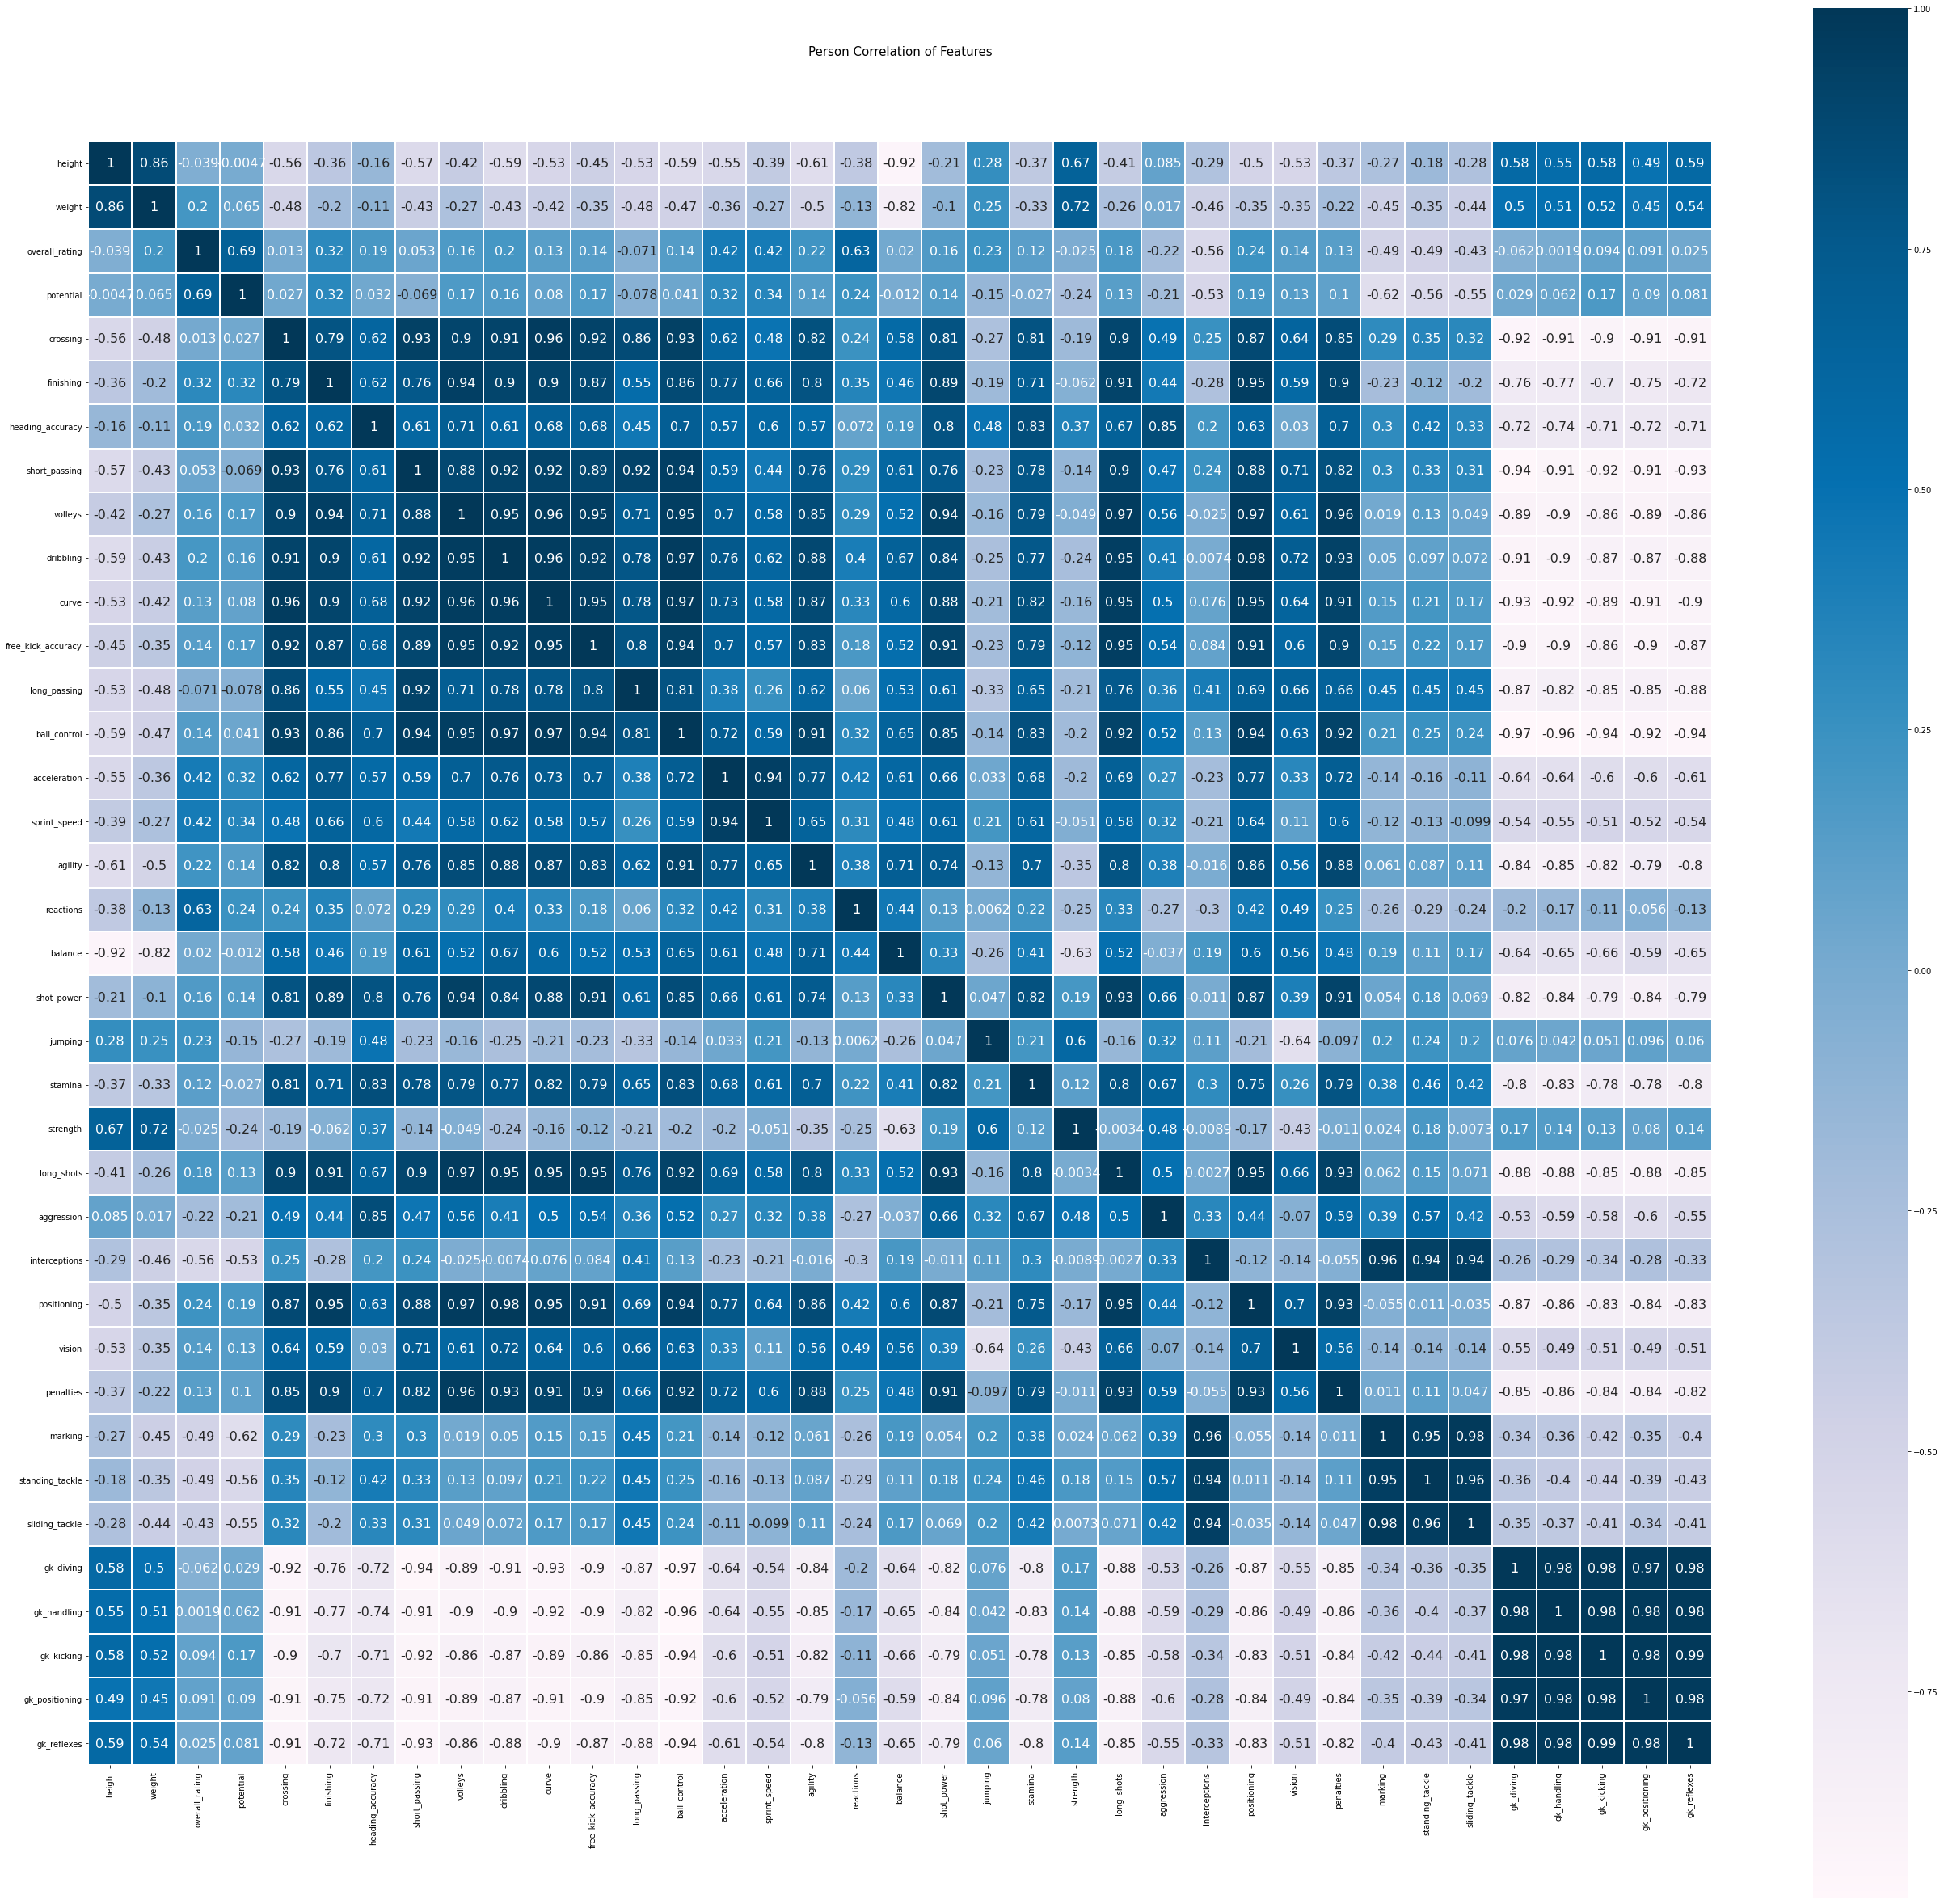

In [21]:
# 히트맵 그리기
colormap = plt.cm.PuBu
plt.figure(figsize=(45, 43))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(top_p20[list(top_p20.columns[5:7]) + list(top_p20.columns[10:12]) + list(top_p20.columns[15:])].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [22]:
fig = px.scatter(top_p20, x="stamina", y="overall_rating", color="player_name")
fig.show()

In [23]:
top_p20[list(top_p20.columns[10:12]) + list(top_p20.columns[15:])]

overall_rating  potential  crossing  finishing  heading_accuracy  \
0             94.0       94.0      80.0       93.0              71.0   
1             93.0       93.0      82.0       95.0              86.0   
2             90.0       90.0      15.0       13.0              25.0   
3             90.0       90.0      77.0       90.0              77.0   
4             90.0       94.0      72.0       88.0              62.0   
5             89.0       89.0      76.0       90.0              76.0   
6             89.0       89.0      80.0       85.0              51.0   
7             88.0       90.0      80.0       81.0              57.0   
8             88.0       89.0      80.0       75.0              54.0   
9             88.0       88.0      70.0       90.0              68.0   
10            88.0       88.0      60.0       38.0              82.0   
11            88.0       89.0      62.0       89.0              83.0   
12            88.0       88.0      79.0       73.0              54.0   
13            87.0       89.0      85.0       76.0              54.0   
14            87.0       87.0      74.0       60.0              86.0   
15            87.0       93.0      88.0       85.0              68.0   
16            87.0       87.0      78.0       71.0              55.0   
17            87.0       89.0      84.0       81.0              76.0   
18            87.0       87.0      84.0       47.0              63.0   
19            87.0       90.0      17.0       13.0              21.0   

    short_passing  volleys  dribbling  curve  free_kick_accuracy  ...  vision  \
0            88.0     85.0       96.0   89.0                90.0  ...    90.0   
1            81.0     87.0       93.0   88.0                77.0  ...    81.0   
2            48.0     11.0       16.0   14.0                11.0  ...    70.0   
3            82.0     87.0       88.0   86.0                84.0  ...    84.0   
4            78.0     83.0       94.0   78.0                79.0  ...    79.0   
5            84.0     92.0       87.0   80.0                80.0  ...    83.0   
6            85.0     86.0       93.0   86.0                83.0  ...    84.0   
7            85.0     79.0       94.0   82.0                79.0  ...    86.0   
8            89.0     77.0       86.0   84.0                79.0  ...    93.0   
9            79.0     85.0       89.0   82.0                72.0  ...    83.0   
10           79.0     63.0       68.0   61.0                73.0  ...    74.0   
11           82.0     84.0       85.0   77.0                68.0  ...    78.0   
12           92.0     74.0       90.0   80.0                70.0  ...    92.0   
13           89.0     82.0       83.0   84.0                83.0  ...    88.0   
14           76.0     66.0       57.0   73.0                68.0  ...    63.0   
15           84.0     91.0       87.0   82.0                86.0  ...    87.0   
16           86.0     75.0       86.0   79.0                77.0  ...    89.0   
17           84.0     76.0       87.0   87.0                85.0  ...    77.0   
18           86.0     66.0       82.0   77.0                59.0  ...    83.0   
19           31.0     13.0       13.0   21.0                19.0  ...    68.0   

    penalties  marking  standing_tackle  sliding_tackle  gk_diving  \
0        74.0     13.0             23.0            21.0        6.0   
1        85.0     22.0             31.0            23.0        7.0   
2        37.0     10.0             10.0            11.0       85.0   
3        85.0     30.0             45.0            38.0       27.0   
4        81.0     21.0             24.0            33.0        9.0   
5        91.0     15.0             41.0            27.0       13.0   
6        80.0     29.0             26.0            26.0       10.0   
7        86.0     25.0             27.0            22.0       11.0   
8        76.0     22.0             16.0            19.0        6.0   
9        83.0     13.0             20.0            12.0       13.0   
10       71.0     9

In [24]:
for i in range(len(df1)):
    df1['birthday'][i] = df1['birthday'][i][:4]

C:\Users\woong\AppData\Local\Temp/ipykernel_8228/2851813624.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
df1['birthday'] = df1['birthday'].astype('int')

In [26]:
df1['age'] = 2022 - df1['birthday']

In [27]:
df1['age']

0        35
1        37
2        36
3        35
4        30
         ..
11055    31
11056    34
11057    34
11058    42
11059    35
Name: age, Length: 11060, dtype: int32

In [28]:
df1.loc[(df1['age'] >= 23) & (df1['age'] < 30), 'age_band'] = '20대'
df1.loc[(df1['age'] >= 30) & (df1['age'] < 40), 'age_band'] = '30대'
df1.loc[(df1['age'] >= 40) & (df1['age'] < 50), 'age_band'] = '40대'
df1.loc[(df1['age'] >= 50) & (df1['age'] < 60), 'age_band'] = '50대'

In [29]:
df1['age_band'].value_counts()

30대    6736
40대    2584
20대    1686
50대      54
Name: age_band, dtype: int64

In [30]:
#나이대별 시각화

([<matplotlib.patches.Wedge at 0x1eab8deceb0>,
 [Text(-0.36949374545128527, 1.036086083331101, ''),
  Text(-0.16621199536759362, -1.0873700256103822, ''),
  Text(0.9602413416082279, -0.5365972100807371, ''),
  Text(1.0998705998234115, -0.0168719780727983, '')],
 [Text(-0.20154204297342831, 0.5651378636351458, '60.9%'),
  Text(-0.09066108838232378, -0.5931109230602084, '23.4%'),
  Text(0.5237680045135789, -0.2926893873167657, '15.2%'),
  Text(0.5999294180854972, -0.009202897130617253, '0.5%')])

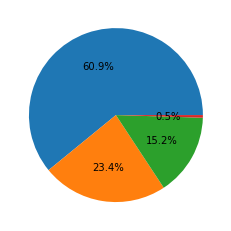

In [31]:
plt.pie(df1['age_band'].value_counts(),autopct='%.1f%%')

In [32]:
fig = px.pie(df1, values=df1['age_band'].value_counts(), names=df1['age_band'].unique())
fig.show()

In [33]:
df1['preferred_foot'].value_counts()

right    8373
left     2687
Name: preferred_foot, dtype: int64

In [34]:
# 주발 선수 수 
fig = px.pie(df1, values=df1['preferred_foot'].value_counts(), names=df1['preferred_foot'].unique())
fig.show()

In [35]:
df_ta = df_ta.sort_values(['date'], ascending=False)

In [36]:
df_ta = df_ta.drop_duplicates(['team_fifa_api_id']).reset_index()

In [37]:
df_ta.drop(['index'], axis=1, inplace=True)

In [38]:
df_ta

id  team_fifa_api_id  team_api_id                 date  \
0    1458             15005        10000  2015-09-10 00:00:00   
1     242               190         9858  2015-09-10 00:00:00   
2     254              1796         8191  2015-09-10 00:00:00   
3     829                68         8550  2015-09-10 00:00:00   
4     835                12         8549  2015-09-10 00:00:00   
..    ...               ...          ...                  ...   
280   719             10018         6421  2010-02-22 00:00:00   
281   419                79         8596  2010-02-22 00:00:00   
282  1103               546         9999  2010-02-22 00:00:00   
283  1187            100646         8614  2010-02-22 00:00:00   
284   927              1564         8242  2010-02-22 00:00:00   

     buildUpPlaySpeed buildUpPlaySpeedClass  buildUpPlayDribbling  \
0                  54              Balanced                  42.0   
1                  42              Balanced                  56.0   
2                  54              Balanced                  32.0   
3                  55              Balanced                  48.0   
4                  60              Balanced                  32.0   
..                ...                   ...                   ...   
280                30                  Slow                   NaN   
281                70                  Fast                   NaN   
282                65              Balanced                   NaN   
283                35              Balanced                   NaN   
284                30                  Slow                   NaN   

    buildUpPlayDribblingClass  buildUpPlayPassing buildUpPlayPassingClass  \
0                      Normal                  51                   Mixed   
1                      Normal                  43                   Mixed   
2                      Little                  67                    Long   
3                      Normal                  49                   Mixed   
4                      Little                  46                   Mixed   
..                        ...                 ...                     ...   
280                    Little                  30                   Short   
281                    Little                  70                    Long   
282                    Little                  60                   Mixed   
283                    Little                  40                   Mixed   
284                    Little                  45                   Mixed   

     ... chanceCreationShooting  chanceCreationShootingClass  \
0    ...                     32                       Little   
1    ...                     69                         Lots   
2    ...                     47                       Normal   
3    ...                     53                       Normal   
4    ...                     37                       Normal   
..   ...                    ...                          ...   
280  ...                     65                       Normal   
281  ...                     70                         Lots   
282  ...                     40                       Normal   
283  ...                     65                       Normal   
284  ...                     70                         Lots   

    chanceCreationPositioningClass  defencePressure defencePressureClass  \
0                        Organised               44               Medium   
1                        Organised               41               Medium   
2                        Organised               63               Medium   
3                        Organised               39               Medium   
4                        Organised               38               Medium   
..                             ...              ...                  ...   
280                      Organised               30                 Deep   
281                      Organised               60               Medium   
282                

In [39]:
df2 = pd.merge(left=df_t, right=df_ta, how="inner", on="team_api_id")
df2

id_x  team_api_id  team_fifa_api_id_x      team_long_name  \
0        1         9987               673.0            KRC Genk   
1        2         9993               675.0        Beerschot AC   
2        3        10000             15005.0    SV Zulte-Waregem   
3        4         9994              2007.0    Sporting Lokeren   
4        5         9984              1750.0   KSV Cercle Brugge   
..     ...          ...                 ...                 ...   
280  49124        10243               894.0           FC Zürich   
281  49479        10190               898.0       FC St. Gallen   
282  49837        10191              1715.0             FC Thun   
283  50201         9777               324.0         Servette FC   
284  50204         7730              1862.0  FC Lausanne-Sports   

    team_short_name  id_y  team_fifa_api_id_y                 date  \
0               GEN   490                 673  2015-09-10 00:00:00   
1               BAC   152                 675  2013-09-20 00:00:00   
2               ZUL  1458               15005  2015-09-10 00:00:00   
3               LOK   764                2007  2015-09-10 00:00:00   
4               CEB   300                1750  2015-09-10 00:00:00   
..              ...   ...                 ...                  ...   
280             ZUR   451                 894  2015-09-10 00:00:00   
281             GAL  1215                 898  2015-09-10 00:00:00   
282             THU  1269                1715  2015-09-10 00:00:00   
283             SER  1156                 324  2013-09-20 00:00:00   
284             LAU   675                1862  2014-09-19 00:00:00   

     buildUpPlaySpeed buildUpPlaySpeedClass  ...  chanceCreationShooting  \
0                  58              Balanced  ...                      56   
1                  47              Balanced  ...                      49   
2                  54              Balanced  ...                      32   
3                  62              Balanced  ...                      62   
4                  53              Balanced  ...                      42   
..                ...                   ...  ...                     ...   
280                62              Balanced  ...                      54   
281                52              Balanced  ...                      37   
282                58              Balanced  ...                      66   
283                48              Balanced  ...                      45   
284                37              Balanced  ...                      52   

    chanceCreationShootingClass  chanceCreationPositioningClass  \
0                        Normal                       Organised   
1                        Normal                       Organised   
2                        Little                       Organised   
3                        Normal                       Organised   
4                        Normal                       Organised   
..                          ...                             ...   
280                      Normal                       Organised   
281                      Normal                       Organised   
282                      Normal                       Organised   
283                      Normal                       Organised   
284                      Normal                       Organised   

    defencePressure defencePressureClass  defenceAggression  \
0                36               Medium                 57   
1                45               Medium                 46   
2                44               Medium                 58   
3                45               Medium                 52   
4                59               Medium                 47   
..              ...                  ...                ...   
280              47               Medium                 43   
281              40               Medium                 36   
282              47               Medium                 45   
283         

In [40]:
# df_m=df_m.sort_values('date', ascending=False)

In [41]:
# df_m = df_m.drop_duplicates(['home_team_api_id']).reset_index()

In [42]:
# df_m.drop(['index'],axis=1,inplace=True)

In [43]:
df_m

id  country_id  league_id     season  stage                 date  \
0          1           1          1  2008/2009      1  2008-08-17 00:00:00   
1          2           1          1  2008/2009      1  2008-08-16 00:00:00   
2          3           1          1  2008/2009      1  2008-08-16 00:00:00   
3          4           1          1  2008/2009      1  2008-08-17 00:00:00   
4          5           1          1  2008/2009      1  2008-08-16 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25974  25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25975  25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25976  25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25977  25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25978  25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0            492473              9987              9993               1  ...   
1            492474             10000              9994               0  ...   
2            492475              9984              8635               0  ...   
3            492476              9991              9998               5  ...   
4            492477              7947              9985               1  ...   
...             ...               ...               ...             ...  ...   
25974       1992091             10190             10191               1  ...   
25975       1992092              9824             10199               1  ...   
25976       1992093              9956             10179               2  ...   
25977       1992094              7896             10243               0  ...   
25978       1992095             10192              9931               4  ...   

        SJA   VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0      4.00  1.65  3.40  4.50  1.78  3.25  4.00  1.73  3.40  4.20  
1      3.80  2.00  3.25  3.25  1.85  3.25  3.75  1.91  3.25  3.60  
2      2.50  2.35  3.25  2.65  2.50  3.20  2.50  2.30  3.20  2.75  
3      7.50  1.45  3.75  6.50  1.50  3.75  5.50  1.44  3.75  6.50  
4      1.73  4.50  3.40  1.65  4.50  3.50  1.65  4.75  3.30  1.67  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
25974   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
25975   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
25976   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
25977   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
25978   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[25979 rows x 115 columns]

In [44]:
df_t

id  team_api_id  team_fifa_api_id      team_long_name team_short_name
0        1         9987             673.0            KRC Genk             GEN
1        2         9993             675.0        Beerschot AC             BAC
2        3        10000           15005.0    SV Zulte-Waregem             ZUL
3        4         9994            2007.0    Sporting Lokeren             LOK
4        5         9984            1750.0   KSV Cercle Brugge             CEB
..     ...          ...               ...                 ...             ...
294  49479        10190             898.0       FC St. Gallen             GAL
295  49837        10191            1715.0             FC Thun             THU
296  50201         9777             324.0         Servette FC             SER
297  50204         7730            1862.0  FC Lausanne-Sports             LAU
298  51606         7896               NaN              Lugano             LUG

[299 rows x 5 columns]

In [45]:
# api -> 팀명으로 변경
for i in range(df_m.shape[0]):
    for j in range(df_t.shape[0]):
        if df_m.iloc[i]['home_team_api_id'] == df_t.iloc[j]['team_api_id']:
            df_m.loc[i, 'home_team'] = df_t.iloc[j]['team_long_name']
        elif df_m.iloc[i]['away_team_api_id'] == df_t.iloc[j]['team_api_id']:
            df_m.loc[i, 'away_team'] = df_t.iloc[j]['team_long_name']

In [46]:
# 경기 결과 기록
for i in range(df_m.shape[0]):
    if df_m.iloc[i]['home_team_goal'] > df_m.iloc[i]['away_team_goal']:
        df_m.loc[i, 'result'] = 'Win'
    elif df_m.iloc[i]['home_team_goal'] == df_m.iloc[i]['away_team_goal']:
        df_m.loc[i, 'result'] = 'Draw'
    else:
        df_m.loc[i, 'result'] = 'Lose'

In [47]:
df_m['result']

0        Draw
1        Draw
2        Lose
3         Win
4        Lose
         ... 
25974     Win
25975    Lose
25976     Win
25977    Draw
25978     Win
Name: result, Length: 25979, dtype: object

In [48]:
df_m

id  country_id  league_id     season  stage                 date  \
0          1           1          1  2008/2009      1  2008-08-17 00:00:00   
1          2           1          1  2008/2009      1  2008-08-16 00:00:00   
2          3           1          1  2008/2009      1  2008-08-16 00:00:00   
3          4           1          1  2008/2009      1  2008-08-17 00:00:00   
4          5           1          1  2008/2009      1  2008-08-16 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25974  25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25975  25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25976  25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25977  25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25978  25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0            492473              9987              9993               1  ...   
1            492474             10000              9994               0  ...   
2            492475              9984              8635               0  ...   
3            492476              9991              9998               5  ...   
4            492477              7947              9985               1  ...   
...             ...               ...               ...             ...  ...   
25974       1992091             10190             10191               1  ...   
25975       1992092              9824             10199               1  ...   
25976       1992093              9956             10179               2  ...   
25977       1992094              7896             10243               0  ...   
25978       1992095             10192              9931               4  ...   

        VCA   GBH   GBD   GBA   BSH   BSD   BSA                home_team  \
0      4.50  1.78  3.25  4.00  1.73  3.40  4.20                 KRC Genk   
1      3.25  1.85  3.25  3.75  1.91  3.25  3.60         SV Zulte-Waregem   
2      2.65  2.50  3.20  2.50  2.30  3.20  2.75        KSV Cercle Brugge   
3      6.50  1.50  3.75  5.50  1.44  3.75  6.50                 KAA Gent   
4      1.65  4.50  3.50  1.65  4.75  3.30  1.67            FCV Dender EH   
...     ...   ...   ...   ...   ...   ...   ...                      ...   
25974   NaN   NaN   NaN   NaN   NaN   NaN   NaN            FC St. Gallen   
25975   NaN   NaN   NaN   NaN   NaN   NaN   NaN                 FC Vaduz   
25976   NaN   NaN   NaN   NaN   NaN   NaN   NaN  Grasshopper Club Zürich   
25977   NaN   NaN   NaN   NaN   NaN   NaN   NaN                   Lugano   
25978   NaN   NaN   NaN   NaN   NaN   NaN   NaN           BSC Young Boys   

               away_team  result  
0           Beerschot AC    Draw  
1       Sporting Lokeren    Draw  
2         RSC Anderlecht    Lose  
3              RAEC Mons     Win  
4      Standard de Liège    Lose  
...                  ...     ...  
25974            FC Thun     Win  
25975          FC Luzern    Lose  
25976            FC Sion     Win  
25977          FC Zürich    Draw  
25978           FC Basel     Win  

[25979 rows x 118 columns]

In [49]:
ManU_h = df_m[df_m['home_team'] == 'Manchester United']
ManU_a = df_m[df_m['away_team'] == 'Manchester United']


In [50]:
ManU_h

id  country_id  league_id     season  stage                 date  \
1728  1729        1729       1729  2008/2009      1  2008-08-17 00:00:00   
1738  1739        1729       1729  2008/2009     10  2008-10-29 00:00:00   
1748  1749        1729       1729  2008/2009     11  2008-11-01 00:00:00   
1768  1769        1729       1729  2008/2009     13  2008-11-15 00:00:00   
1798  1799        1729       1729  2008/2009     16  2008-12-06 00:00:00   
...    ...         ...        ...        ...    ...                  ...   
4663  4664        1729       1729  2015/2016     34  2016-04-16 00:00:00   
4681  4682        1729       1729  2015/2016     36  2016-05-01 00:00:00   
4701  4702        1729       1729  2015/2016     38  2016-05-17 00:00:00   
4722  4723        1729       1729  2015/2016      5  2015-09-12 00:00:00   
4740  4741        1729       1729  2015/2016      7  2015-09-26 00:00:00   

      match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
1728        489042             10260             10261               1  ...   
1738        489132             10260              8654               2  ...   
1748        489142             10260              8667               4  ...   
1768        489162             10260             10194               5  ...   
1798        489192             10260              8472               1  ...   
...            ...               ...               ...             ...  ...   
4663       1989045             10260             10252               1  ...   
4681       1989063             10260              8197               1  ...   
4701       1987600             10260              8678               3  ...   
4722       1988754             10260              8650               3  ...   
4740       1988772             10260              8472               3  ...   

        VCA   GBH   GBD   GBA   BSH  BSD   BSA          home_team  \
1728  12.00  1.30  4.75  10.0  1.29  4.5  11.0  Manchester United   
1738  19.00  1.20  6.00  13.0  1.22  5.5  12.0  Manchester United   
1748  19.00  1.18  6.00  17.0  1.17  6.5  13.0  Manchester United   
1768  13.00  1.15  7.50  16.0  1.14  6.5  17.0  Manchester United   
1798  17.00  1.16  6.50  15.0  1.17  7.0  23.0  Manchester United   
...     ...   ...   ...   ...   ...  ...   ...                ...   
4663  17.00   NaN   NaN   NaN   NaN  NaN   NaN  Manchester United   
4681   4.10   NaN   NaN   NaN   NaN  NaN   NaN  Manchester United   
4701   5.20   NaN   NaN   NaN   NaN  NaN   NaN  Manchester United   
4722   4.33   NaN   NaN   NaN   NaN  NaN   NaN  Manchester United   
4740  15.00   NaN   NaN   NaN   NaN  NaN   NaN  Manchester United   

             away_team  result  
1728  Newcastle United    Draw  
1738   West Ham United     Win  
1748         Hull City     Win  
1768        Stoke City     Win  
1798        Sunderland     Win  
...                ...     ...  
4663       Aston Villa     Win  
4681    Leicester City    Draw  
4701       Bournemouth     Win  
4722         Liverpool     Win  
4740        Sunderland     Win  

[152 rows x 118 columns]

In [51]:
ManU_h['result'].value_counts().index

Index(['Win', 'Lose', 'Draw'], dtype='object')

In [52]:
# 맨체스터 유나이티드 홈경기 결과 
fig = px.pie(df1, values=ManU_h['result'].value_counts(), names=ManU_h['result'].value_counts().index)
fig.show()

In [53]:
# 맨체스터 유나이티드 어웨이경기 결과 
fig = px.pie(df1, values=ManU_a['result'].value_counts(), names=ManU_a['result'].value_counts().index)
fig.show()

In [54]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [55]:
trace3 = go.Bar(x=ManU_h['result'].value_counts().index, y=ManU_h['result'].value_counts(), name='home')
trace4 = go.Bar(x=ManU_a['result'].value_counts().index, y=ManU_a['result'].value_counts(), name='away')

data = [trace3, trace4]
layout = go.Layout(title='맨유 홈&어웨이 비교')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [56]:
for i in range(df_m.shape[0]):
    if df_m.iloc[i]['home_team_goal'] > df_m.iloc[i]['away_team_goal']:
        df_m.loc[i, 'Winner'] = df_m.iloc[i]['home_team']
    elif df_m.iloc[i]['home_team_goal'] == df_m.iloc[i]['away_team_goal']:
        df_m.loc[i, 'Winner'] = 'Draw'
    else:
        df_m.loc[i, 'Winner'] = df_m.iloc[i]['away_team']

In [57]:
df_m['Winner']

0                           Draw
1                           Draw
2                 RSC Anderlecht
3                       KAA Gent
4              Standard de Liège
                  ...           
25974              FC St. Gallen
25975                  FC Luzern
25976    Grasshopper Club Zürich
25977                       Draw
25978             BSC Young Boys
Name: Winner, Length: 25979, dtype: object

In [67]:
# 각종 유명 더비
Manchester=df_m[((df_m['home_team'] == 'Manchester City') | (df_m['home_team'] == 'Manchester United')) & ((df_m['away_team'] == 'Manchester City') | (df_m['away_team'] == 'Manchester United'))]
North_London=df_m[((df_m['home_team'] == 'Tottenham Hotspur') | (df_m['home_team'] == 'Arsenal')) & ((df_m['away_team'] == 'Tottenham Hotspur') | (df_m['away_team'] == 'Arsenal'))]
NorthWest_London=df_m[((df_m['home_team'] == 'Tottenham Hotspur') | (df_m['home_team'] == 'Chelsea')) & ((df_m['away_team'] == 'Tottenham Hotspur') | (df_m['away_team'] == 'Chelsea'))]
EL=df_m[((df_m['home_team'] == 'FC Barcelona') | (df_m['home_team'] == 'Real Madrid CF')) & ((df_m['away_team'] == 'FC Barcelona') | (df_m['away_team'] == 'Real Madrid CF'))]

In [60]:
# 맨체스터 더비
fig = px.pie(df1, values=Manchester['Winner'].value_counts(), names=Manchester['Winner'].value_counts().index, title='맨체스터 더비(유나이티드 vs 시티)')
fig.show()

In [61]:
EL

id  country_id  league_id     season  stage                 date  \
21577  21578       21518      21518  2008/2009     15  2008-12-13 00:00:00   
21793  21794       21518      21518  2008/2009     34  2009-05-02 00:00:00   
21933  21934       21518      21518  2009/2010     12  2009-11-29 00:00:00   
22143  22144       21518      21518  2009/2010     31  2010-04-10 00:00:00   
22320  22321       21518      21518  2010/2011     13  2010-11-29 00:00:00   
22530  22531       21518      21518  2010/2011     32  2011-04-16 00:00:00   
22736  22737       21518      21518  2011/2012     16  2011-12-10 00:00:00   
22939  22940       21518      21518  2011/2012     35  2012-04-21 00:00:00   
23225  23226       21518      21518  2012/2013     26  2013-03-02 00:00:00   
23395  23396       21518      21518  2012/2013      7  2012-10-07 00:00:00   
23433  23434       21518      21518  2013/2014     10  2013-10-26 00:00:00   
23633  23634       21518      21518  2013/2014     29  2014-03-23 00:00:00   
24004  24005       21518      21518  2014/2015     28  2015-03-22 00:00:00   
24174  24175       21518      21518  2014/2015      9  2014-10-25 00:00:00   
24209  24210       21518      21518  2015/2016     12  2015-11-21 00:00:00   
24419  24420       21518      21518  2015/2016     31  2016-04-02 00:00:00   

       match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
21577        530343              8634              8633               2  ...   
21793        530640              8633              8634               2  ...   
21933        684766              8634              8633               1  ...   
22143        685104              8633              8634               0  ...   
22320        875704              8634              8633               5  ...   
22530        875970              8633              8634               1  ...   
22736       1051808              8633              8634               1  ...   
22939       1051981              8634              8633               1  ...   
23225       1260112              8633              8634               2  ...   
23395       1260080              8634              8633               2  ...   
23433       1505908              8634              8633               2  ...   
23633       1506098              8633              8634               3  ...   
24004       1778311              8634              8633               2  ...   
24174       1778121              8633              8634               3  ...   
24209       2030194              8633              8634               0  ...   
24419       2030460              8634              8633               1  ...   

        GBH   GBD   GBA   BSH   BSD   BSA       home_team       away_team  \
21577  1.60  3.75  5.75  1.62  3.75  6.00    FC Barcelona  Real Madrid CF   
21793  2.60  3.25  2.60  2.50  3.40  2.62  Real Madrid CF    FC Barcelona   
21933  1.85  3.50  4.00  1.83  3.60  4.20    FC Barcelona  Real Madrid CF   
22143  2.50  3.40  2.60  2.50  3.50  2.62  Real Madrid CF    FC Barcelona   
22320  2.10  3.50  3.30  2.10  3.60  3.30    FC Barcelona  Real Madrid CF   
22530  2.60  3.60  2.40  2.70  3.50  2.50  Real Madrid CF    FC Barcelona   
22736  2.40  3.40  2.75  2.38  3.50  2.88  Real Madrid CF    FC Barcelona   
22939  1.65  3.75  5.00  1.67  3.75  4.75    FC Barcelona  Real Madrid CF   
23225  2.65  3.70  2.40  3.00  3.50  2.30  Real Madrid CF    FC Barcelona   
23395  1.95  4.00  3.60  1.85  3.75  4.00    FC Barcelona  Real Madrid CF   
23433   NaN   NaN   NaN   NaN   NaN   NaN    FC Barcelona  Real Madrid CF   
23633   NaN   NaN   NaN   NaN   NaN   NaN  Real Madrid CF    FC Barcelona   
24004   NaN   NaN   NaN   NaN   NaN   NaN    FC Barcelona  Real Madrid CF   
24174   NaN   NaN   NaN   NaN   NaN   NaN  Real Madrid CF    FC Barcelona   
24209   NaN   NaN   NaN   NaN   NaN   NaN  Real Madrid CF    FC Barcelona   
24419   NaN   NaN   NaN   NaN   NaN   NaN    FC Barcelona  Real Madrid CF   

       resul

In [62]:
# 엘클라시코
fig = px.pie(df1, values=EL['Winner'].value_counts(), names=EL['Winner'].value_counts().index, title='엘클라시코(바르샤 vs 레알)')
fig.show()

In [63]:
North_London

id  country_id  league_id     season  stage                 date  \
1739  1740        1729       1729  2008/2009     10  2008-10-29 00:00:00   
1899  1900        1729       1729  2008/2009     25  2009-02-08 00:00:00   
2135  2136        1729       1729  2009/2010     11  2009-10-31 00:00:00   
2381  2382        1729       1729  2009/2010     34  2010-04-14 00:00:00   
2539  2540        1729       1729  2010/2011     14  2010-11-20 00:00:00   
2688  2689        1729       1729  2010/2011     28  2011-04-20 00:00:00   
3048  3049        1729       1729  2011/2012     26  2012-02-26 00:00:00   
3226  3227        1729       1729  2011/2012      7  2011-10-02 00:00:00   
3278  3279        1729       1729  2012/2013     12  2012-11-17 00:00:00   
3456  3457        1729       1729  2012/2013     28  2013-03-03 00:00:00   
3848  3849        1729       1729  2013/2014      3  2013-09-01 00:00:00   
3867  3868        1729       1729  2013/2014     30  2014-03-16 00:00:00   
4176  4177        1729       1729  2014/2015     24  2015-02-07 00:00:00   
4348  4349        1729       1729  2014/2015      6  2014-09-27 00:00:00   
4418  4419        1729       1729  2015/2016     12  2015-11-08 00:00:00   
4605  4606        1729       1729  2015/2016     29  2016-03-05 00:00:00   

      match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
1739        489133              9825              8586               4  ...   
1899        489284              8586              9825               0  ...   
2135        658716              9825              8586               3  ...   
2381        659152              8586              9825               2  ...   
2539        839945              9825              8586               2  ...   
2688        840125              8586              9825               3  ...   
3048       1025556              9825              8586               5  ...   
3226       1024549              8586              9825               2  ...   
3278       1229218              9825              8586               5  ...   
3456       1229405              8586              9825               2  ...   
3848       1474151              9825              8586               1  ...   
3867       1475026              8586              9825               0  ...   
4176       1724220              8586              9825               2  ...   
4348       1724032              9825              8586               1  ...   
4418       1988820              9825              8586               1  ...   
4605       1988997              8586              9825               2  ...   

       GBH   GBD   GBA   BSH   BSD   BSA          home_team  \
1739  1.45  4.00  7.00  1.40  4.00  8.00            Arsenal   
1899  2.90  3.25  2.40  2.88  3.20  2.50  Tottenham Hotspur   
2135  1.57  4.00  5.25  1.57  3.75  5.50            Arsenal   
2381  3.10  3.25  2.25  3.20  3.30  2.25  Tottenham Hotspur   
2539  1.65  3.75  5.00  1.62  3.60  5.50            Arsenal   
2688  2.75  3.40  2.40  2.60  3.40  2.60  Tottenham Hotspur   
3048  2.40  3.30  2.80  2.50  3.40  2.70            Arsenal   
3226  2.10  3.40  3.25  2.10  3.25  3.50  Tottenham Hotspur   
3278  1.95  3.70  3.90  1.91  3.60  3.75            Arsenal   
3456  2.30  3.40  3.00  2.20  3.40  3.10  Tottenham Hotspur   
3848   NaN   NaN   NaN   NaN   NaN   NaN            Arsenal   
3867   NaN   NaN   NaN   NaN   NaN   NaN  Tottenham Hotspur   
4176   NaN   NaN   NaN   NaN   NaN   NaN  Tottenham Hotspur   
4348   NaN   NaN   NaN   NaN   NaN   NaN            Arsenal   
4418   NaN   NaN   NaN   NaN   NaN   NaN            Arsenal   
4605   NaN   NaN   NaN   NaN   NaN   NaN  Tottenham Hotspur   

              away_team  result             Winner  
1739  Tottenham Hotspur    Draw               Draw  
1899            Arsenal    Draw               Draw  
2135  Tottenham Hotspur     Win            Arsenal  
2381            Arsenal     Win  Tottenham Hotspur  
2539  Tottenham Hotspur    Lose  T

In [64]:
# 북런던 더비
fig = px.pie(df1, values=North_London['Winner'].value_counts(), names=North_London['Winner'].value_counts().index, title='북런던 더비(토트넘 vs 아스날)')
fig.show()

In [65]:
NorthWest_London

id  country_id  league_id     season  stage                 date  \
1957  1958        1729       1729  2008/2009      3  2008-08-31 00:00:00   
1959  1960        1729       1729  2008/2009     30  2009-03-21 00:00:00   
2389  2390        1729       1729  2009/2010     35  2010-04-17 00:00:00   
2457  2458        1729       1729  2009/2010      6  2009-09-20 00:00:00   
2569  2570        1729       1729  2010/2011     17  2010-12-12 00:00:00   
2777  2778        1729       1729  2010/2011     35  2011-04-30 00:00:00   
2949  2950        1729       1729  2011/2012     17  2011-12-22 00:00:00   
3100  3101        1729       1729  2011/2012     30  2012-03-24 00:00:00   
3510  3511        1729       1729  2012/2013     33  2013-05-08 00:00:00   
3615  3616        1729       1729  2012/2013      8  2012-10-20 00:00:00   
3840  3841        1729       1729  2013/2014     29  2014-03-08 00:00:00   
3977  3978        1729       1729  2013/2014      6  2013-09-28 00:00:00   
4065  4066        1729       1729  2014/2015     14  2014-12-03 00:00:00   
4136  4137        1729       1729  2014/2015     20  2015-01-01 00:00:00   
4446  4447        1729       1729  2015/2016     14  2015-11-29 00:00:00   
4679  4680        1729       1729  2015/2016     36  2016-05-02 00:00:00   

      match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
1957        489071              8455              8586               1  ...   
1959        489334              8586              8455               1  ...   
2389        659160              8586              8455               2  ...   
2457        658632              8455              8586               3  ...   
2569        839975              8586              8455               1  ...   
2777        840204              8455              8586               2  ...   
2949       1025023              8586              8455               1  ...   
3100       1025783              8455              8586               0  ...   
3510       1229453              8455              8586               2  ...   
3615       1229181              8586              8455               2  ...   
3840       1475007              8455              8586               4  ...   
3977       1474223              8586              8455               1  ...   
4065       1724119              8455              8586               3  ...   
4136       1724180              8586              8455               5  ...   
4446       1988848              8586              8455               0  ...   
4679       1989061              8455              8586               2  ...   

       GBH   GBD   GBA   BSH   BSD   BSA          home_team  \
1957  1.40  4.00  8.50  1.40  4.00  8.50            Chelsea   
1959  4.00  3.30  1.90  4.20  3.40  1.95  Tottenham Hotspur   
2389  4.00  3.30  1.90  4.00  3.40  1.91  Tottenham Hotspur   
2457  1.50  3.75  7.00  1.50  3.80  7.00            Chelsea   
2569  2.75  3.20  2.50  2.75  3.20  2.50  Tottenham Hotspur   
2777  1.50  4.00  6.00  1.50  4.00  7.00            Chelsea   
2949  2.50  3.20  2.75  2.50  3.30  2.75  Tottenham Hotspur   
3100  1.85  3.50  4.00  1.91  3.50  4.00            Chelsea   
3510  1.87  3.60  3.90  1.91  3.60  3.75            Chelsea   
3615  2.60  3.40  2.75  2.60  3.25  2.70  Tottenham Hotspur   
3840   NaN   NaN   NaN   NaN   NaN   NaN            Chelsea   
3977   NaN   NaN   NaN   NaN   NaN   NaN  Tottenham Hotspur   
4065   NaN   NaN   NaN   NaN   NaN   NaN            Chelsea   
4136   NaN   NaN   NaN   NaN   NaN   NaN  Tottenham Hotspur   
4446   NaN   NaN   NaN   NaN   NaN   NaN  Tottenham Hotspur   
4679   NaN   NaN   NaN   NaN   NaN   NaN            Chelsea   

              away_team  result             Winner  
1957  Tottenham Hotspur    Draw               Draw  
1959            Chelsea     Win  Tottenham Hotspur  
2389            Chelsea     Win  Tottenham Hotspur  
2457  Tottenham Hotspur     Win            Chelsea  
2569            Chelsea    Draw   

In [68]:
# 서북런던 더비 (첼시 vs 토트넘)
fig = px.pie(df1, values=NorthWest_London['Winner'].value_counts(), names=NorthWest_London['Winner'].value_counts().index, title='서북런던 더비 (첼시 vs 토트넘)')
fig.show()